In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
url="http://bit.ly/w-data"
df=pd.read_csv(url)

Before diving in to the prediction lets do an Exploratory Data Analysis(EDA) and see how the features are varying with respect to each other

In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
df.shape

(25, 2)

In [6]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull().sum()  #no null values

Hours     0
Scores    0
dtype: int64

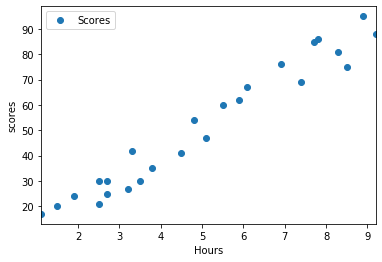

In [9]:
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel('Hours')
plt.ylabel('scores')
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

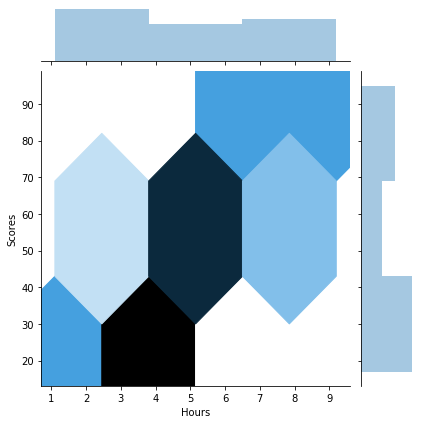

In [10]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='hex')

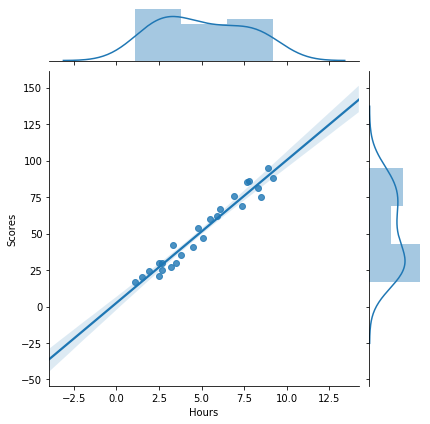

In [11]:
sns.jointplot(x='Hours',y='Scores',data=df,kind='reg')

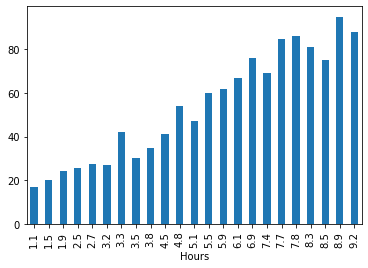

In [12]:
 df.groupby('Hours')['Scores'].median().plot.bar()

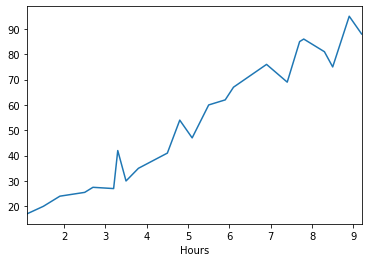

In [13]:
df.groupby('Hours')['Scores'].median().plot(kind='line')

Interesting plots.Its clearly showing that the increase in hours is not exactly directly proportional beacuse if you see the person
who is spending 3-3.5 hrs is getting more marks than person spending 3.5-4 hrs

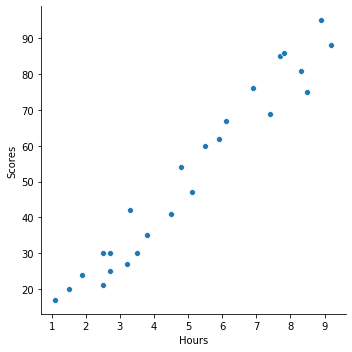

In [14]:
sns.relplot(x='Hours',y='Scores',data=df)

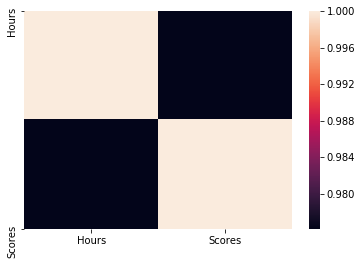

In [15]:
sns.heatmap(df.corr())

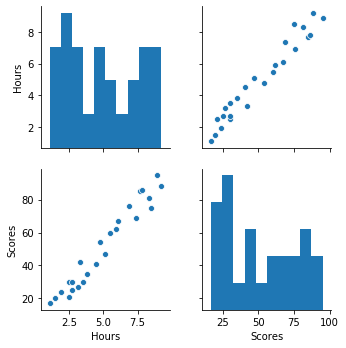

In [16]:
sns.pairplot(df)

Taking the dependent and independent variables from given data set
x-Independent Variable
y-Dependent Variable

In [17]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

Simple Linear Regression:
Linear regression models are used to show or predict the relationship between two variables or factors. The factor that is being predicted (the factor that the equation solves for) is called the dependent variable. The factors that are used to predict the value of the dependent variable are called the independent variables.


In linear regression, each observation consists of two values. One value is for the dependent variable and one value is for the independent variable. In this simple model, a straight line approximates the relationship between the dependent variable and the independent variable.


When two or more independent variables are used in regression analysis, the model is no longer a simple linear one. This is known as multiple regression

Trainining the Algorithm

In [19]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Making the prediction

In [20]:
y_pred=regressor.predict(x_test)

In [21]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [22]:
print('Trainining score : ',regressor.score(x_train,y_train))
print('Test Score : ',regressor.score(x_test,y_test))

Trainining score :  0.9515510725211553
Test Score :  0.9454906892105356


Visualizing the train set results

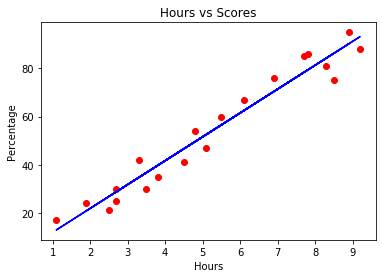

In [23]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

Visualizing the test set results

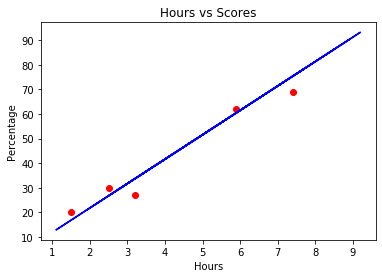

In [24]:
plt.scatter(x_test,y_test,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('Hours vs Scores')
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

In [25]:
df1= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737538


The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


In [28]:
print('Root Mean Squaren Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Root Mean Squaren Error: 4.6474476121003665
